In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [61]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [25]:
eqk = raw_eqk[ (raw_eqk['type'] == 'earthquake') & (raw_eqk['mag'] >= 6.5)]

eqk

,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake
22968,2014-03-16 21:16:29.600,-19.9807,-70.7022,20.00,6.7,usc000ndnj,"64km WNW of Iquique, Chile",earthquake
24887,2014-03-10 05:18:13.400,40.8287,-125.1338,16.60,6.8,nc72182046,"78km WNW of Ferndale, California",earthquake
26972,2014-03-02 20:11:23.430,27.4312,127.3674,119.00,6.5,usb000mzmn,"111km NNW of Nago, Japan",earthquake
29890,2014-04-24 03:10:10.150,49.6388,-127.7316,10.00,6.5,usb000px6r,"120km S of Port Hardy, Canada",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,usb000pr89,"70km SW of Panguna, Papua New Guinea",earthquake


In [29]:
eqk = gpd.GeoDataFrame(eqk, geometry=gpd.points_from_xy(eqk.longitude, eqk.latitude, crs = 'EPSG:4326'))
 

<AxesSubplot:>

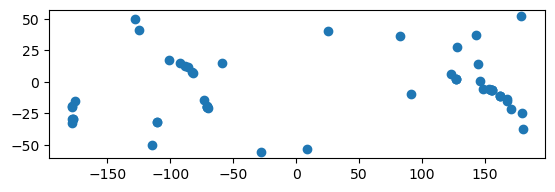

In [30]:
eqk.plot()

In [31]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap
worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

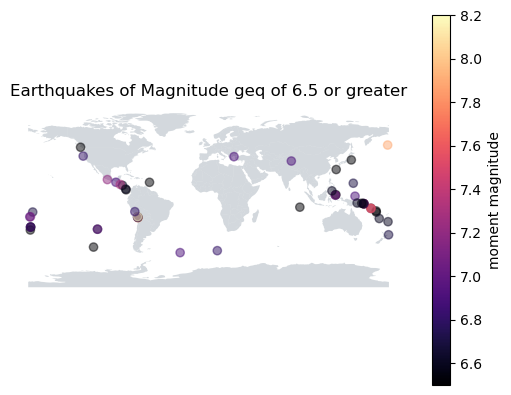

In [59]:
fig, ax = plt.subplots()

worldmap.plot (ax = ax,
              color = 'slategrey',
              alpha = 0.3)
eqk.plot(ax = ax,
        column = 'mag',
        alpha = 0.5,
        legend = True,
        cmap = 'magma',
        legend_kwds={'label': 'moment magnitude', 'orientation': 'vertical'})

ax.set_title('Earthquakes of Magnitude geq of 6.5 or greater')

ax.set_axis_off()
plt.show()